## Overview of GenPic on GitHub

GenPic ist eine Sammlung von IPython Notebooks zur Generierung und Verwaltung von Bildern im SVG Format.

1. **GPGH01-Show-Palettes** stellt die Farbpaletten aus der Datei **color-palettes.data** da.

2. **GPGH02-Picture-Generator** generiert parametergesteuert Bilder und speichert sie als *svgz* File.


## Picture Generator

GenPic nutzt verbreitete Standardkomponenten und Python Module.

+ Daten werden in Dateien gespeichert
    + Parameter und Farbpaletten werden in **Json** gespeichert.
    + Die Bilddaten werden in **SVG/SVGZ** gespeichert. 

+ Templates werden mit **Jinja2** erstellt.

+ Die XML Bearbeitung basiert auf **lxml**.

+ **Numpy** wird zur Array und List Generierung genutzt

### Roadmap

1) Zunächst Ertellung guter, einfacher und ausbaufähiger Basis-Module:
  + zur Lösung folgender Aufgaben:
    * Datenspeicherung: Files und ggf. alternativ auch Datenbank
    * Parameter-Steuerungskonzept und Aufbau
    * Figuren und Bildergenerierung
    * Farbpalettenverwaltung
    * Parameterverwaltung
  
  + Strukturiert in Funktionen und Objekten
  
  + klar strukturierte und dokumentierte Json Nutzung für Parameter
  
  + Nutzung von Generics, Abstraktion ....
 
  + **Alles gut progammiert, dokumentiert und testautomatisiert.**
  
2) Einfache ipynb's für Workflow:  
  + Farbpalette auswählen, bzw. erstellen
  + Komfortable und flexible SVG Generierung
  + Generierung von HTML Katalogen
  + *ggf. Bildermutationen etc. aus existierenden Bildern:*
    - z.B. Reihenfolge oder Figuren ändern, Bilder mischen etc.
  + Gut progammiert, dokumentiert und testautomatisiert.

3) Basis zum Aufbau einer Community schaffen
  + Nutzung und Darstellung in GitHub
  + Erstellung eines Wicki (siehe d3.js) - auch/insbesondere durch User:
    * Anleitungen z.B. für Konvertierung der Bilder in das png Format
    * Diskussion zur Nutzung von Parametern und Farbpaletten für Bilder
    * Einstellung und Erzeugung von Bildern
    * Nutzung eigener *Picture Structures* und *Figures*

#### Aktuelle to do's

**Offen**:

+ Bilder mit Gridmuster können nicht erstellt werden 
  
+ gp_basics.py ist nicht ausreichend dokumentiert

**Erledigt**:

### Import Modules and Constants

In [2]:
from gp_basics import *

###  Line Construction

In [3]:
nr_of_origins = 30
nr_of_lines = 20

origins_x_area = (0, 50)
origins_y_area = (100, 100)

target_x_area = (95, 100)
target_y_area = (0, 0)

# Define starting points for the lines
origins =[]
targets =[]
for i in range(nr_of_origins):
    origins.append((randint(origins_x_area[0], origins_x_area[1]),
                    randint(origins_y_area[0], origins_y_area[1])))
for i in range(nr_of_lines):
    targets.append((randint(target_x_area[0], target_x_area[1]),
                    randint(target_y_area[0], target_y_area[1])))

# Define lines
lines =[]
for i in range(nr_of_lines):
    p1 = choice(origins)
    p2 = choice(targets)
    lines.append((p1[0], p1[1], p2[0], p2[1]))

## Produce Pictures

In [4]:
import copy
from IPython.display import HTML, SVG

In [5]:
# Define basic picture attributtes for the pictures SVG template  like size, background ...
pic_attribs = {'svg_width':'21in', 'svg_height':'21in',
        'w_points':'100', 'h_points':'100',
        'fill':'grey', 
        'opacity':'.4',
        'stroke':'white',
        'stroke_opacity':'.3', 
        'stroke_width':'0.1'}

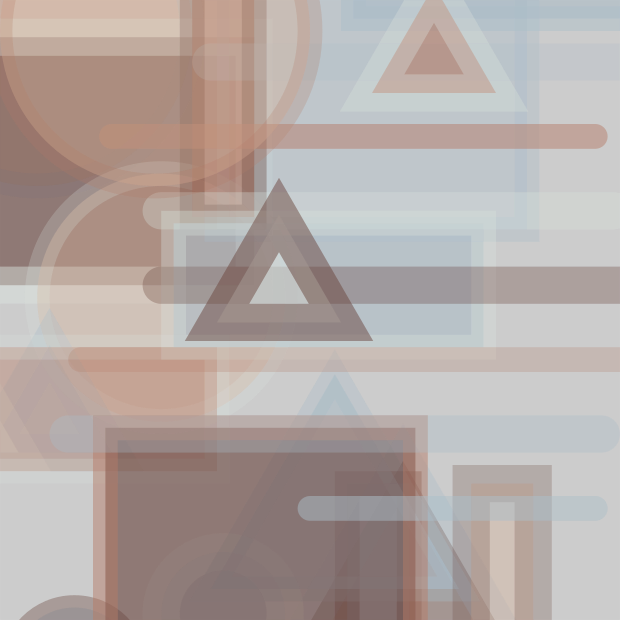

In [6]:
color_id = 651
nr_of_figures = 32
# set the colors
palette = get_palette(color_id)
params ={}
params['structure'] = 'RANDOM'
params['colorid'] = color_id
params['palette'] = palette
params['nr_of_figures'] = nr_of_figures
figs_to_choice = ( 'rect' , 'polygon', 'circle', 'line',) #'rect', 'circle', 'polygon',
#params['figures'] = [random.choice(figs_to_choice) for i in range(nr_of_figures)]
params['figures'] = ('rc', [figs_to_choice, ]) 

# params for creation of circles rects and polygons(triangles) 
params['x'] = ('ri', [-20, 120])
params['y'] = ('ri', [-20, 120])
params['height'] = ('rc', ([40, 20,   ], ))
params['width'] = ('rc', ([50, 10, ], ))

# params for line creation
params['x1'] = ('ar', ([l[0] for l in lines], ))
#params['y1'] = ('ar', ([l[1] for l in lines], ))
params['x2'] = ('ar', ([l[2] for l in lines], ))  #('ri', [0, 100])
#params['y2'] = ('ar', ([l[3] for l in lines], ))
y1_list = list(range(10, 100, 12)) * int((nr_of_figures / 3))
params['y1'] = ('ar', (y1_list, ))
y2_list = copy.deepcopy(y1_list)
params['y2'] = ('ar', (y2_list, ))

# params for svg style 
params['fill'] = ('rc', [palette[:],] )
params['opacity'] = ('rc', [( .6, .4), ]) 
params['stroke'] = ('rc', [palette[:],] )
params['stroke-linecap'] = ('rc', (["round",], ))
params['stroke-opacity'] = ('rc', [( .8, .6), ])
params['stroke-width'] = ('rc', [(6, 4  ), ])
params['transform'] = ('rc', [[ 0, 180  ], ])

svg = SVGPicture(params, pic_attribs=pic_attribs) 
SVG(svg.xml_to_string().replace('21in', '620px'))

## Save Picture To File

In [6]:
svg.to_file(zip = False)

NameError: name 'svg' is not defined

In [16]:
svg_list = svg.xml_to_string().split('\n')

In [17]:
for l in svg_list:
    if l[1:5] == 'line': print(l)

<line fill="#68443C" opacity="0.4" stroke="#ABBDC8" stroke-linecap="round" stroke-opacity="0.6" stroke-width="6" x1="34" x2="100" y1="10" y2="10"/>
<line fill="#D9E1DD" opacity="0.6" stroke="#B67B66" stroke-linecap="round" stroke-opacity="0.8" stroke-width="4" x1="18" x2="96" y1="22" y2="22"/>
<line fill="#ABBDC8" opacity="0.4" stroke="#D9E1DD" stroke-linecap="round" stroke-opacity="0.8" stroke-width="6" x1="26" x2="99" y1="34" y2="34"/>
<line fill="#ABBDC8" opacity="0.4" stroke="#68443C" stroke-linecap="round" stroke-opacity="0.8" stroke-width="6" x1="26" x2="100" y1="46" y2="46"/>
<line fill="#68443C" opacity="0.4" stroke="#B67B66" stroke-linecap="round" stroke-opacity="0.6" stroke-width="4" x1="13" x2="100" y1="58" y2="58"/>
<line fill="#B67B66" opacity="0.4" stroke="#ABBDC8" stroke-linecap="round" stroke-opacity="0.8" stroke-width="6" x1="11" x2="97" y1="70" y2="70"/>
<line fill="#68443C" opacity="0.6" stroke="#ABBDC8" stroke-linecap="round" stroke-opacity="0.8" stroke-width="4" x1

In [18]:
print(svg_list[10:25])

['', '<rect fill="#ABBDC8" height="20" opacity="0.6" stroke="#ABBDC8" stroke-linecap="round" stroke-opacity="0.8" stroke-width="4" transform="rotate(0, 82.0, -7.0)" width="50" x="57" y="-17"/>', '<circle fill="#D8B29A" opacity="0.4" stroke="#ABBDC8" stroke-linecap="round" stroke-opacity="0.8" stroke-width="4" r="25.00" cx="6.00" cy="5.00"/>', '<rect fill="#68443C" height="40" opacity="0.6" stroke="#D9E1DD" stroke-linecap="round" stroke-opacity="0.8" stroke-width="6" transform="rotate(0, 16.0, 26.0)" width="50" x="-9" y="6"/>', '<circle fill="#D8B29A" opacity="0.4" stroke="#D9E1DD" stroke-linecap="round" stroke-opacity="0.6" stroke-width="4" r="20.00" cx="26.00" cy="48.00"/>', '<circle fill="#B67B66" opacity="0.6" stroke="#68443C" stroke-linecap="round" stroke-opacity="0.6" stroke-width="4" r="25.00" cx="50.00" cy="143.00"/>', '<polygon fill="#ABBDC8" opacity="0.4" stroke="#ABBDC8" stroke-linecap="round" stroke-opacity="0.8" stroke-width="6" transform="rotate(180, 13.0, 63.0)" points="8

In [11]:
print(json.dumps(params, indent = 2))

{
  "x": [
    "ri",
    [
      -20,
      120
    ]
  ],
  "width": [
    "rc",
    [
      [
        50,
        10
      ]
    ]
  ],
  "figures": [
    "rc",
    [
      [
        "rect",
        "polygon",
        "circle",
        "line"
      ]
    ]
  ],
  "x2": [
    "ar",
    [
      [
        99,
        99,
        100,
        96,
        97,
        97,
        97,
        99,
        96,
        97,
        96,
        96,
        96
      ]
    ]
  ],
  "stroke": [
    "rc",
    [
      [
        "#ABBDC8",
        "#D9E1DD",
        "#68443C",
        "#B67B66",
        "#D8B29A"
      ]
    ]
  ],
  "stroke-opacity": [
    "rc",
    [
      [
        0.8,
        0.6
      ]
    ]
  ],
  "height": [
    "rc",
    [
      [
        40,
        20
      ]
    ]
  ],
  "opacity": [
    "rc",
    [
      [
        0.6,
        0.4
      ]
    ]
  ],
  "y": [
    "ri",
    [
      -20,
      120
    ]
  ],
  "fill": [
    "rc",
    [
      [
        "#ABBDC8",
        "#D